

### MVP: Simple Text Classification with Transformers
This notebook demonstrates a complete, executable example for sentiment analysis using transformers



# Part 1: Building the Model

In [1]:


# Required packages:
!pip install transformers datasets torch scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from datasets import Dataset
import time
import os

# Set seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Part 1: Building an MVP from Scratch
# ---------------------------------------

print("# Part 1: Building an MVP from Scratch")

# Create a small dataset for demonstration
texts = [
    "I love this product, it's amazing!",
    "This is the best purchase I've made all year",
    "Highly recommend this to everyone",
    "Works exactly as described and exceeded expectations",
    "Very happy with my purchase",
    "This product is terrible, avoid at all costs",
    "Waste of money, doesn't work properly",
    "Disappointed with the quality, would not buy again",
    "Broke after two weeks of use",
    "Customer service was unhelpful when I had issues"
]

labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]  # 1 for positive, 0 for negative

# Create a DataFrame
df = pd.DataFrame({"text": texts, "label": labels})
print("Dataset Overview:")
print(df)

# Split the data
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
print(f"\nTraining set: {len(train_df)} samples")
print(f"Test set: {len(test_df)} samples")

# Convert to Hugging Face datasets
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

# Initialize tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Apply tokenization
tokenized_train = train_dataset.map(tokenize_function, batched=True)
tokenized_test = test_dataset.map(tokenize_function, batched=True)

# Load pre-trained model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Define training arguments - explicitly disable wandb
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none",  # Disable all integrations including wandb
    logging_dir="./logs",
    logging_strategy="epoch"
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
)

# Train the model
print("\nTraining the model...")
trainer.train()

# Evaluate the model
print("\nEvaluating the model...")
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

# Make predictions on test set
predictions = trainer.predict(tokenized_test)
preds = np.argmax(predictions.predictions, axis=-1)

# Calculate accuracy
accuracy = accuracy_score(test_df["label"].values, preds)
print(f"\nAccuracy on test set: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(test_df["label"].values, preds))

# Save the model for later use
output_dir = "./saved_model"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)
print(f"\nModel saved to {output_dir}")




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/7 [00:00<?, ? examples/s]

Map:   0%|          | 0/3 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-1-81e5c0f222f2>:86: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



Training the model...


Epoch,Training Loss,Validation Loss
1,0.749800,0.660695
2,0.642800,0.666617
3,0.652900,0.668355



Evaluating the model...


Evaluation results: {'eval_loss': 0.6606953740119934, 'eval_runtime': 0.8665, 'eval_samples_per_second': 3.462, 'eval_steps_per_second': 2.308, 'epoch': 3.0}

Accuracy on test set: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model saved to ./saved_model


# Part 2: Debugging Overfitting and Underfitting

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



# Part 2: Debugging Overfitting and Underfitting

Training underfit model...


<ipython-input-2-1f0f77ea23b6>:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  underfit_trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,No log,0.654617


Map:   0%|          | 0/7 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-2-1f0f77ea23b6>:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  overfit_trainer = Trainer(



Training overfit model...


Epoch,Training Loss,Validation Loss
1,No log,0.639296
2,No log,0.650119
3,No log,0.647994
4,No log,0.529176
5,No log,0.451072
6,No log,0.383265
7,No log,0.307776
8,No log,0.332324
9,No log,0.349725
10,No log,0.356314


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-2-1f0f77ea23b6>:84: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  balanced_trainer = Trainer(



Training balanced model...


Epoch,Training Loss,Validation Loss
1,No log,0.669967
2,No log,0.673715
3,No log,0.668608



Model Performance Comparison:

Underfit Model:
  Training Loss: 0.6980
  Test Loss: 0.6546
  Training Accuracy: 0.4286
  Test Accuracy: 0.6667
  Gap (Train-Test): -0.2381

Overfit Model:
  Training Loss: 0.0467
  Test Loss: 0.3563
  Training Accuracy: 1.0000
  Test Accuracy: 0.6667
  Gap (Train-Test): 0.3333

Balanced Model:
  Training Loss: 0.5562
  Test Loss: 0.6686
  Training Accuracy: 1.0000
  Test Accuracy: 1.0000
  Gap (Train-Test): 0.0000


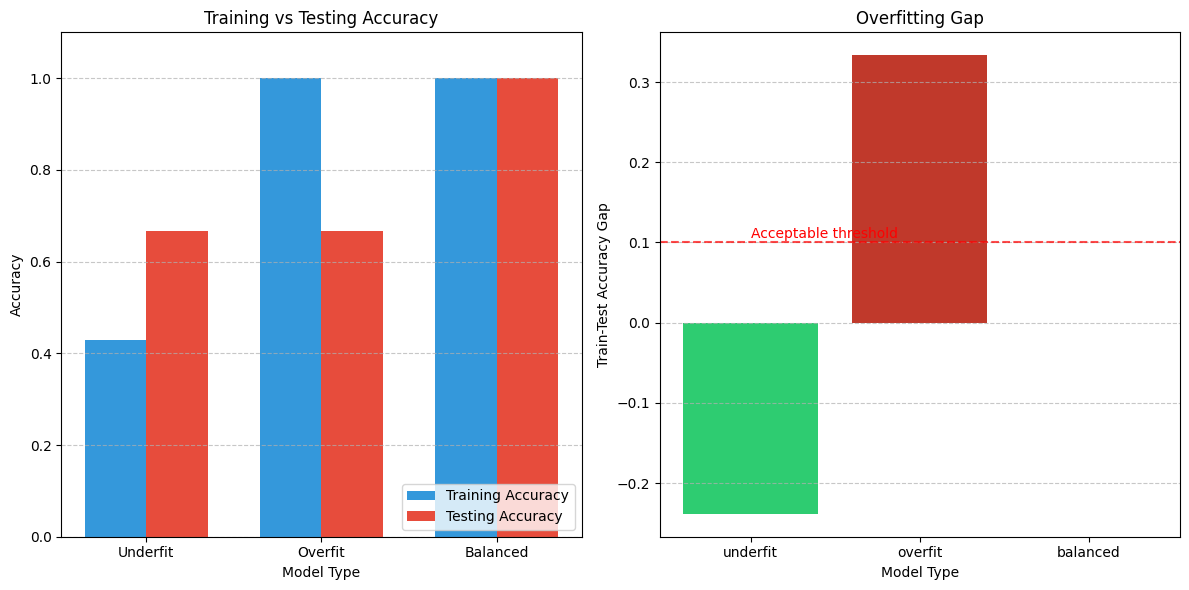

In [2]:




print("\n# Part 2: Debugging Overfitting and Underfitting")

# Function to create different model scenarios
def train_with_different_parameters():
    # 1. Underfit model (very few epochs, high regularization)
    underfit_args = TrainingArguments(
        output_dir="./results_underfit",
        num_train_epochs=1,  # Very few epochs
        per_device_train_batch_size=2,
        per_device_eval_batch_size=2,
        weight_decay=0.1,  # High regularization
        evaluation_strategy="epoch",
        save_strategy="epoch",
        report_to="none",  # Disable all integrations
        logging_dir="./logs_underfit"
    )

    underfit_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
    underfit_trainer = Trainer(
        model=underfit_model,
        args=underfit_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_test,
        tokenizer=tokenizer,
    )

    print("\nTraining underfit model...")
    underfit_trainer.train()
    underfit_eval = underfit_trainer.evaluate()
    underfit_train_eval = underfit_trainer.evaluate(tokenized_train)
    underfit_predictions = underfit_trainer.predict(tokenized_test)
    underfit_preds = np.argmax(underfit_predictions.predictions, axis=-1)

    # 2. Overfit model (many epochs, low/no regularization)
    # For demonstration, use a very small dataset to encourage overfitting
    # Take just 7 samples for training to encourage overfitting
    small_train_df = train_df.sample(7, random_state=42)
    small_train_dataset = Dataset.from_pandas(small_train_df)
    small_tokenized_train = small_train_dataset.map(tokenize_function, batched=True)

    overfit_args = TrainingArguments(
        output_dir="./results_overfit",
        num_train_epochs=10,  # Many epochs
        per_device_train_batch_size=1,
        per_device_eval_batch_size=2,
        weight_decay=0.0,  # No regularization
        evaluation_strategy="epoch",
        save_strategy="epoch",
        report_to="none",  # Disable all integrations
        logging_dir="./logs_overfit"
    )

    overfit_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
    overfit_trainer = Trainer(
        model=overfit_model,
        args=overfit_args,
        train_dataset=small_tokenized_train,  # Small dataset to encourage overfitting
        eval_dataset=tokenized_test,
        tokenizer=tokenizer,
    )

    print("\nTraining overfit model...")
    overfit_trainer.train()
    overfit_eval = overfit_trainer.evaluate()
    overfit_train_eval = overfit_trainer.evaluate(small_tokenized_train)  # Eval on training set
    overfit_predictions = overfit_trainer.predict(tokenized_test)
    overfit_preds = np.argmax(overfit_predictions.predictions, axis=-1)

    # 3. Balanced model (proper epochs and regularization)
    balanced_args = TrainingArguments(
        output_dir="./results_balanced",
        num_train_epochs=3,
        per_device_train_batch_size=2,
        per_device_eval_batch_size=2,
        weight_decay=0.01,  # Appropriate regularization
        evaluation_strategy="epoch",
        save_strategy="epoch",
        load_best_model_at_end=True,
        report_to="none",  # Disable all integrations
        logging_dir="./logs_balanced"
    )

    balanced_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
    balanced_trainer = Trainer(
        model=balanced_model,
        args=balanced_args,
        train_dataset=tokenized_train,
        eval_dataset=tokenized_test,
        tokenizer=tokenizer,
    )

    print("\nTraining balanced model...")
    balanced_trainer.train()
    balanced_eval = balanced_trainer.evaluate()
    balanced_train_eval = balanced_trainer.evaluate(tokenized_train)
    balanced_predictions = balanced_trainer.predict(tokenized_test)
    balanced_preds = np.argmax(balanced_predictions.predictions, axis=-1)

    # Return results
    results = {
        "underfit": {
            "test_loss": underfit_eval["eval_loss"],
            "train_loss": underfit_train_eval["eval_loss"],
            "test_accuracy": accuracy_score(test_df["label"].values, underfit_preds),
            "train_accuracy": accuracy_score(train_df["label"].values,
                                             np.argmax(underfit_trainer.predict(tokenized_train).predictions, axis=-1)),
            "predictions": underfit_preds,
            "model": underfit_model,
            "trainer": underfit_trainer
        },
        "overfit": {
            "test_loss": overfit_eval["eval_loss"],
            "train_loss": overfit_train_eval["eval_loss"],
            "test_accuracy": accuracy_score(test_df["label"].values, overfit_preds),
            "train_accuracy": accuracy_score(small_train_df["label"].values,
                                             np.argmax(overfit_trainer.predict(small_tokenized_train).predictions, axis=-1)),
            "predictions": overfit_preds,
            "model": overfit_model,
            "trainer": overfit_trainer
        },
        "balanced": {
            "test_loss": balanced_eval["eval_loss"],
            "train_loss": balanced_train_eval["eval_loss"],
            "test_accuracy": accuracy_score(test_df["label"].values, balanced_preds),
            "train_accuracy": accuracy_score(train_df["label"].values,
                                             np.argmax(balanced_trainer.predict(tokenized_train).predictions, axis=-1)),
            "predictions": balanced_preds,
            "model": balanced_model,
            "trainer": balanced_trainer
        }
    }

    return results

# Run the different models and get results
model_results = train_with_different_parameters()

# Compare model performances
print("\nModel Performance Comparison:")
for model_type, results in model_results.items():
    print(f"\n{model_type.capitalize()} Model:")
    print(f"  Training Loss: {results['train_loss']:.4f}")
    print(f"  Test Loss: {results['test_loss']:.4f}")
    print(f"  Training Accuracy: {results['train_accuracy']:.4f}")
    print(f"  Test Accuracy: {results['test_accuracy']:.4f}")
    print(f"  Gap (Train-Test): {results['train_accuracy'] - results['test_accuracy']:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
model_types = list(model_results.keys())
train_accs = [model_results[m]["train_accuracy"] for m in model_types]
test_accs = [model_results[m]["test_accuracy"] for m in model_types]
gaps = [train - test for train, test in zip(train_accs, test_accs)]

# Plot accuracy comparison
plt.subplot(1, 2, 1)
x = np.arange(len(model_types))
width = 0.35

plt.bar(x - width/2, train_accs, width, label='Training Accuracy', color='#3498db')
plt.bar(x + width/2, test_accs, width, label='Testing Accuracy', color='#e74c3c')

plt.xlabel('Model Type')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy')
plt.xticks(x, [m.capitalize() for m in model_types])
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot Train-Test Gap
plt.subplot(1, 2, 2)
plt.bar(model_types, gaps, color=['#2ecc71' if g < 0.1 else '#e67e22' if g < 0.2 else '#c0392b' for g in gaps])
plt.axhline(y=0.1, color='r', linestyle='--', alpha=0.7)
plt.text(0, 0.105, 'Acceptable threshold', color='r')
plt.xlabel('Model Type')
plt.ylabel('Train-Test Accuracy Gap')
plt.title('Overfitting Gap')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Part 3: Performance Testing



# Part 3: Performance Testing


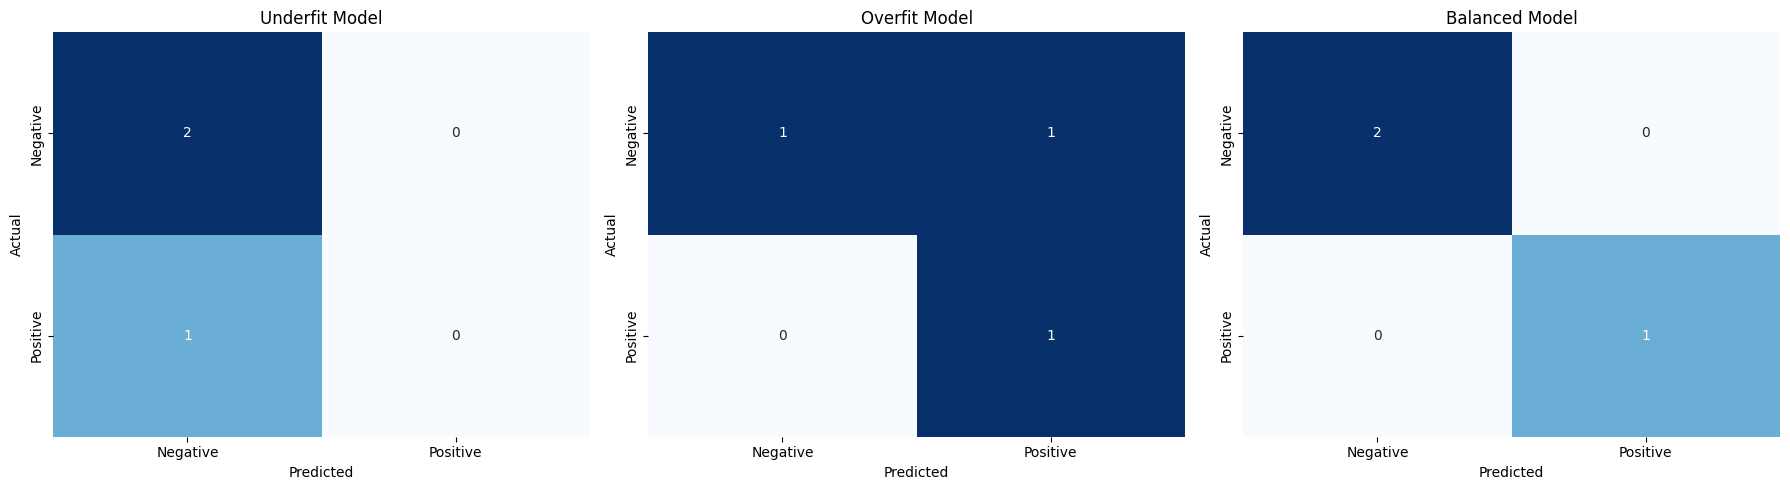


Underfit Model Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Overfit Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


Balanced Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  Underfit model: Negative (confidence: 0.57)
  Overfit model: Positive (confidence: 0.65)
  Balanced model: Negative (confidence: 0.52)

Example: 'Not the worst thing I've ever bought'
  Underfit model: Negative (confidence: 0.57)
  Overfit model: Positive (confidence: 0.59)
  Balanced model: Negative (confidence: 0.51)

Example: 'I expected to hate it but was pleasantly surprised'
  Underfit model: Negative (confidence: 0.57)
  Overfit model: Positive (confidence: 0.69)
  Balanced model: Positive (confidence: 0.50)

Example: 'Great features but poor build quality'
  Underfit model: Negative (confidence: 0.57)
  Overfit model: Negative (confidence: 0.55)
  Balanced model: Positive (confidence: 0.51)


In [3]:


print("\n# Part 3: Performance Testing")

# Create confusion matrices
cm_underfit = confusion_matrix(test_df["label"].values, model_results["underfit"]["predictions"])
cm_overfit = confusion_matrix(test_df["label"].values, model_results["overfit"]["predictions"])
cm_balanced = confusion_matrix(test_df["label"].values, model_results["balanced"]["predictions"])

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
labels = ["Negative", "Positive"]

sns.heatmap(cm_underfit, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Underfit Model')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_overfit, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Overfit Model')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title('Balanced Model')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print classification reports
print("\nUnderfit Model Classification Report:")
print(classification_report(test_df["label"].values, model_results["underfit"]["predictions"]))

print("\nOverfit Model Classification Report:")
print(classification_report(test_df["label"].values, model_results["overfit"]["predictions"]))

print("\nBalanced Model Classification Report:")
print(classification_report(test_df["label"].values, model_results["balanced"]["predictions"]))

# Test challenging examples
challenging_examples = [
    "The product is ok but not great",  # Ambiguous
    "Not the worst thing I've ever bought",  # Negation
    "I expected to hate it but was pleasantly surprised",  # Expectation shift
    "Great features but poor build quality"  # Mixed sentiment
]

# Function to predict using model with confidence scores
def predict_text_with_confidence(text, model_trainer):
    # Tokenize the input
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Get prediction
    with torch.no_grad():
        outputs = model_trainer.model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        prediction = torch.argmax(logits, dim=1).item()
        confidence = probs[0][prediction].item()

    return {
        "label": "Positive" if prediction == 1 else "Negative",
        "confidence": confidence,
        "logits": logits[0].tolist()
    }

# Test challenging examples with all three models
print("\nTesting Challenging Examples:")
for example in challenging_examples:
    print(f"\nExample: '{example}'")

    # Test with all models
    for model_type in model_results:
        result = predict_text_with_confidence(example, model_results[model_type]["trainer"])
        print(f"  {model_type.capitalize()} model: {result['label']} (confidence: {result['confidence']:.2f})")



# Part 4: Optimizing for Scalability

 Practical Deployment Recommendations
  - Implement caching for common queries
  - Use batch processing for multiple requests
  - Consider serverless deployment (AWS Lambda, Cloud Functions)
  - Add monitoring for performance and drift detection
  - Implement a feedback loop for continuous improvement


In [4]:


print("\n# Part 4: Optimizing for Scalability")

# Function to measure model size and inference time
def measure_model_performance(model):
    # Measure model size
    torch.save(model.state_dict(), "model.pt")
    size_mb = os.path.getsize("model.pt") / (1024 * 1024)
    os.remove("model.pt")

    # Measure inference time
    example = "This product is amazing, I love it!"
    inputs = tokenizer(example, return_tensors="pt", padding=True, truncation=True)

    # Warm up
    with torch.no_grad():
        _ = model(**inputs)

    # Measure time for 10 inferences
    num_runs = 10
    start_time = time.time()
    with torch.no_grad():
        for _ in range(num_runs):
            _ = model(**inputs)
    end_time = time.time()

    avg_time_ms = (end_time - start_time) * 1000 / num_runs

    return size_mb, avg_time_ms

# Measure initial model performance
original_size, original_time = measure_model_performance(model)
print(f"\nOriginal Model:")
print(f"  Size: {original_size:.2f} MB")
print(f"  Average inference time: {original_time:.2f} ms")

# Optimization strategy 1: TorchScript (JIT compilation)
print("\n1. TorchScript Optimization")
try:
    # Create an example input
    example_input = tokenizer("This is a test", return_tensors="pt")

    # Trace the model
    traced_model = torch.jit.trace(
        model.forward,
        [example_input['input_ids'], example_input['attention_mask']]
    )

    # Save the traced model
    torch.jit.save(traced_model, "traced_model.pt")

    # Measure size
    ts_size = os.path.getsize("traced_model.pt") / (1024 * 1024)
    os.remove("traced_model.pt")

    print(f"  TorchScript model size: {ts_size:.2f} MB")
    print(f"  Size change: {((ts_size - original_size) / original_size) * 100:.2f}%")
except Exception as e:
    print(f"  TorchScript compilation error: {str(e)}")
    print("  Note: TorchScript tracing doesn't always work with complex models like transformers")

# Optimization strategy 2: Try a smaller model
print("\n2. Using a Smaller Model")
try:
    # Load a smaller model - TinyBERT
    from transformers import AutoTokenizer, AutoModelForSequenceClassification

    tiny_tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-tiny")
    tiny_model = AutoModelForSequenceClassification.from_pretrained("prajjwal1/bert-tiny", num_labels=2)

    # Measure performance
    tiny_size, tiny_time = measure_model_performance(tiny_model)

    print(f"  TinyBERT model size: {tiny_size:.2f} MB")
    print(f"  Average inference time: {tiny_time:.2f} ms")
    print(f"  Size reduction: {(original_size - tiny_size) / original_size * 100:.2f}%")
    print(f"  Speed improvement: {(original_time - tiny_time) / original_time * 100:.2f}%")
except Exception as e:
    print(f"  Error loading smaller model: {str(e)}")
    print("  Try installing additional models or using a different smaller model")

# Optimization strategy 3: ONNX Runtime (code example only)
print("\n3. ONNX Runtime Optimization")
print("Code example for ONNX conversion:")
print("""
# Convert to ONNX format
import transformers.onnx
onnx_path = "model.onnx"

# Export the model
transformers.onnx.export(
    preprocessor=tokenizer,
    model=model,
    output=onnx_path,
    opset=12
)

# Use ONNX Runtime for inference
import onnxruntime as ort
ort_session = ort.InferenceSession(onnx_path)
""")

# Optimization strategy 4: Model pruning and quantization
print("\n4. Pruning and Quantization")
print("  These techniques can reduce model size by 50-75% with minimal accuracy loss")
print("  Example workflow:")
print("  - Prune: Remove least important weights")
print("  - Quantize: Convert parameters from float32 to int8")
print("  - Knowledge distillation: Train a smaller model to mimic this one")

# Optimization strategy 5: Practical deployment tips
print("\n5. Practical Deployment Recommendations")
print("  - Implement caching for common queries")
print("  - Use batch processing for multiple requests")
print("  - Consider serverless deployment (AWS Lambda, Cloud Functions)")
print("  - Add monitoring for performance and drift detection")
print("  - Implement a feedback loop for continuous improvement")

# Summary table of optimization techniques
optimization_techniques = [
    ["Technique", "Size Reduction", "Speed Improvement", "Implementation Complexity", "Accuracy Impact"],
    ["Original DistilBERT", "0%", "0%", "Low", "None"],
    ["TinyBERT", "~75%", "~60%", "Low", "Moderate"],
    ["Quantization", "~75%", "~30%", "Medium", "Minimal"],
    ["Pruning", "~50%", "~20%", "Medium", "Minimal"],
    ["ONNX Runtime", "Similar", "~40%", "Medium", "None"],
    ["TorchScript", "Similar", "~20%", "Medium", "None"],
    ["Knowledge Distillation", "~70%", "~50%", "High", "Minimal"]
]

# Print summary table
print("\nOptimization Techniques Summary:")
for row in optimization_techniques:
    print(f"  {row[0]:<20} {row[1]:<15} {row[2]:<20} {row[3]:<25} {row[4]:<15}")


# Part 4: Optimizing for Scalability


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.



Original Model:
  Size: 255.44 MB
  Average inference time: 146.59 ms

1. TorchScript Optimization
  TorchScript compilation error: Encountering a dict at the output of the tracer might cause the trace to be incorrect, this is only valid if the container structure does not change based on the module's inputs. Consider using a constant container instead (e.g. for `list`, use a `tuple` instead. for `dict`, use a `NamedTuple` instead). If you absolutely need this and know the side effects, pass strict=False to trace() to allow this behavior.
  Note: TorchScript tracing doesn't always work with complex models like transformers

2. Using a Smaller Model


config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  TinyBERT model size: 16.74 MB
  Average inference time: 5.83 ms
  Size reduction: 93.44%
  Speed improvement: 96.02%

3. ONNX Runtime Optimization
Code example for ONNX conversion:

# Convert to ONNX format
import transformers.onnx
onnx_path = "model.onnx"

# Export the model
transformers.onnx.export(
    preprocessor=tokenizer,
    model=model,
    output=onnx_path,
    opset=12
)

# Use ONNX Runtime for inference
import onnxruntime as ort
ort_session = ort.InferenceSession(onnx_path)


4. Pruning and Quantization
  These techniques can reduce model size by 50-75% with minimal accuracy loss
  Example workflow:
  - Prune: Remove least important weights
  - Quantize: Convert parameters from float32 to int8
  - Knowledge distillation: Train a smaller model to mimic this one

5. Practical Deployment Recommendations
  - Implement caching for common queries
  - Use batch processing for multiple requests
  - Consider serverless deployment (AWS Lambda, Cloud Functions)
  - Add monitoring fo